<h1>Election Compaign - Sentimental analysis</h1>
<br>
<strong>Election campaign sentiment analysis involves analyzing public sentiment towards political candidates, parties, or issues during an election campaign. This analysis typically involves processing large volumes of textual data from various sources such as social media, news articles, blogs, and public forums to gauge the overall sentiment towards specific entities or topics related to the election.</strong>
<br>
<h3>1. Import Libraries</h3>
<ol>
  <li><strong>pandas</strong>: A powerful data manipulation library in Python, used for data analysis and manipulation. It provides data structures like DataFrame and tools for reading and writing data between various formats.</li>
  <li><strong>numpy</strong>: A fundamental package for scientific computing with Python. It provides support for multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.</li>
  <li><strong>matplotlib.pyplot</strong>: A plotting library for creating static, interactive, and animated visualizations in Python. It is widely used for generating plots, histograms, bar charts, scatterplots, etc.</li>
  <li><strong>seaborn</strong>: A data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.</li>
  <li><strong>re</strong>: The built-in regular expression module in Python, used for pattern matching and string manipulation tasks.</li>
  <li><strong>nltk</strong>: The Natural Language Toolkit is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for tokenization, stemming, tagging, parsing, and classification.</li>
  <li><strong>sklearn.model_selection.train_test_split</strong>: A function from scikit-learn used to split arrays or matrices into random train and test subsets.</li>
  <li><strong>sklearn.feature_extraction.text.TfidfVectorizer</strong>: A scikit-learn class used to convert a collection of raw documents into a matrix of TF-IDF features.</li>
  <li><strong>sklearn.pipeline.Pipeline</strong>: A scikit-learn class used to sequentially apply a list of transforms and a final estimator. Pipelines help to automate workflows and apply transformations consistently.</li>
  <li><strong>sklearn.metrics</strong>: A module in scikit-learn containing various evaluation metrics such as accuracy_score, confusion_matrix, classification_report, etc., used to evaluate the performance of machine learning models.</li>
  <li><strong>sklearn.naive_bayes</strong>: The scikit-learn module containing implementations of Naive Bayes classifiers, which are a family of simple probabilistic classifiers based on Bayes' theorem with strong independence assumptions between the features.</li>
  <li><strong>sklearn.linear_model.LogisticRegression</strong>: The scikit-learn class for logistic regression, a linear model used for binary classification tasks.</li>
  <li><strong>sklearn.svm.LinearSVC</strong>: The scikit-learn class for linear support vector classification, a linear model used for binary and multiclass classification tasks.</li>
  <li><strong>sklearn.neighbors.KNeighborsClassifier</strong>: The scikit-learn class for K-nearest neighbors classification, a non-parametric method used for classification and regression tasks.</li>
  <li><strong>bs4.BeautifulSoup</strong>: A Python library for pulling data out of HTML and XML files. It provides functions and methods for parsing HTML and XML documents, extracting information, and navigating the parse tree.</li>
  <li><strong>nltk.corpus.stopwords</strong>: A list of common stopwords (e.g., "the", "and", "is") in English, provided by the NLTK library.</li>
  <li><strong>sklearn.ensemble.RandomForestClassifier</strong>: The scikit-learn class for random forest classification, an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.</li>
  <li><strong>sklearn.ensemble.GradientBoostingClassifier</strong>: The scikit-learn class for gradient boosting classification, an ensemble learning method that builds a strong model by sequentially adding weak models (typically decision trees) and correcting errors made by the previous models.</li>
</ol>
These libraries and modules are essential for tasks such as data preprocessing, feature extraction, model training, evaluation, and visualization in machine learning and natural language processing tasks.

In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

<h3>2. Read the dataset</h3>

In [2]:
data = pd.read_csv("training_data.csv", nrows=10000)

In [3]:
data.head(3)

,Unnamed: 0,tweet,sentiment
0,0,ndtv anchor let go over to aap live press conf...,negative
1,1,sambit patra attacks rahul gandhi over his cow...,neutral
2,2,crediting the bjp with taking development to s...,neutral


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   tweet       10000 non-null  object
 2   sentiment   10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


<h3>Data Pre Processing</h3>
<ol>
  <li><strong><code>removeHTML(raw_text)</code></strong>: This function takes a raw text input and uses the <code>BeautifulSoup</code> library to remove any HTML elements present in the text. It returns the clean text without HTML tags.</li>
  <li><strong><code>removeSpecialChar(raw_text)</code></strong>: This function takes a raw text input and uses regular expressions to remove any special characters and numbers from the text. It only retains alphabetic characters (both uppercase and lowercase). The cleaned text is then returned.</li>
  <li><strong><code>toLowerCase(raw_text)</code></strong>: This function takes a raw text input and converts all characters to lowercase. It then splits the text into individual words and joins them back together with spaces. This ensures that all text is in lowercase format.</li>
  <li><strong><code>removeStopWords(raw_text)</code></strong>: This function takes a raw text input and removes common English stopwords using NLTK's <code>stopwords</code> corpus. Stopwords are words that occur frequently in the language but do not carry significant meaning (e.g., "the", "is", "and"). The function returns the text with stopwords removed.</li>
</ol>

In [5]:
# function to remove html elements from the reviews
def removeHTML(raw_text):
    clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text() 
    return clean_HTML

# function to remove special characters and numbers from the reviews4961
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)  
    return clean_SpecialChar

# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return( " ".join(clean_LowerCase)) 

# function to remove stop words from the reviews
def removeStopWords(raw_text):
    stops = set(stopwords.words("english"))
    words = [w for w in raw_text if not w in stops]
    return( " ".join(words))

In [6]:
#Train and Test Data Split

X = data['tweet']
Y = data['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [7]:
# X_training clean set
X_train_cleaned = []

for val in X_train:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    X_train_cleaned.append(val) 
    
# X_testing clean set
X_test_cleaned = []

for val in X_test:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    X_test_cleaned.append(val) 

<h3>4. Training the model</h3>
<ol>
  <li><strong><code>tvec = TfidfVectorizer(use_idf=True, strip_accents='ascii')</code></strong>: This line initializes a TF-IDF vectorizer object named <code>tvec</code>. TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents. The <code>use_idf=True</code> parameter indicates that the vectorizer should include IDF (Inverse Document Frequency) in its computation, which helps to downweight terms that appear frequently across all documents. The <code>strip_accents='ascii'</code> parameter specifies that accents and diacritics should be stripped from the text during tokenization, ensuring that all characters are in ASCII format.</li>
  <li><strong><code>X_train_tvec = tvec.fit_transform(X_train_cleaned)</code></strong>: This line fits the TF-IDF vectorizer to the training data (<code>X_train_cleaned</code>) and transforms it into a TF-IDF matrix <code>X_train_tvec</code>. The <code>fit_transform</code> method both fits the vectorizer to the training data and transforms the data into a matrix in a single step. Each row of the matrix represents a document from the training data, and each column represents a unique term in the corpus. The values in the matrix are the TF-IDF scores for each term in each document. This TF-IDF matrix is commonly used as input for machine learning algorithms in natural language processing tasks such as text classification, clustering, and information retrieval.</li>
</ol>

Once the data vectorized it has fed into the machine learners for training purpose

In [8]:
tvec = TfidfVectorizer(use_idf=True,
strip_accents='ascii')

X_train_tvec = tvec.fit_transform(X_train_cleaned)

In [9]:
from sklearn.svm import SVC

# Support Vector Classifier model
svr_lin = SVC(kernel='rbf', C=1.0, gamma='scale')
svr_lin.fit(X_train_tvec, Y_train)

svr_lin_predictions = svr_lin.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,svr_lin_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

              precision  recall  f1-score  support
negative           0.92    0.44      0.59   686.00
neutral            0.68    0.94      0.79  1198.00
positive           0.83    0.75      0.79  1116.00
accuracy           0.76    0.76      0.76     0.76
macro avg          0.81    0.71      0.72  3000.00
weighted avg       0.79    0.76      0.75  3000.00


In [10]:
# K-Nearest Neighbor model
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train_tvec, Y_train)

# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
knn_predictions = knn.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,knn_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

              precision  recall  f1-score  support
negative           0.47    0.41      0.44   686.00
neutral            0.51    0.69      0.58  1198.00
positive           0.59    0.41      0.48  1116.00
accuracy           0.52    0.52      0.52     0.52
macro avg          0.52    0.50      0.50  3000.00
weighted avg       0.53    0.52      0.51  3000.00


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train_tvec, Y_train)

# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
gb_predictions = gb.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test, gb_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

              precision  recall  f1-score  support
negative           0.92    0.56      0.70   686.00
neutral            0.72    0.99      0.83  1198.00
positive           0.92    0.76      0.83  1116.00
accuracy           0.81    0.81      0.81     0.81
macro avg          0.85    0.77      0.79  3000.00
weighted avg       0.84    0.81      0.80  3000.00


In [12]:
from sklearn.neural_network import MLPClassifier

# Artificial Neural Network Model
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)  # You can adjust the hidden_layer_sizes and max_iter as needed
ann.fit(X_train_tvec, Y_train)

# Predict using training and testing data and display the evaluation metrics
ann_predictions = ann.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test, ann_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)


              precision  recall  f1-score  support
negative           0.74    0.60      0.66   686.00
neutral            0.75    0.79      0.77  1198.00
positive           0.75    0.79      0.77  1116.00
accuracy           0.75    0.75      0.75     0.75
macro avg          0.75    0.73      0.73  3000.00
weighted avg       0.75    0.75      0.74  3000.00


<ol>
  <li><strong>Import Statements:</strong> The code imports necessary libraries and modules, including time, warnings, and specific classifiers and ensemble methods from scikit-learn.</li>
  <li><strong>Suppress FutureWarning:</strong> This line suppresses the FutureWarning related to the dual parameter of SVM (Support Vector Machine) classifiers, ensuring that it does not clutter the output during execution.</li>
  <li><strong>Initialize Base Classifiers:</strong> Four base classifiers are initialized with default parameters: LinearSVC (Linear Support Vector Classifier), KNeighborsClassifier (K-Nearest Neighbors Classifier), MLPClassifier (Multi-layer Perceptron Classifier), and GradientBoostingClassifier (Gradient Boosting Classifier).</li>
  <li><strong>Initialize Stacked Classifier:</strong> The StackingClassifier is initialized with the previously defined base classifiers. It uses a RandomForestClassifier as the final estimator and performs 2-fold cross-validation (<code>cv=2</code>).</li>
  <li><strong>Training the Stacked Classifier:</strong> The StackingClassifier is trained on the training data (<code>X_train_tvec</code> and <code>Y_train</code>).</li>
  <li><strong>Make Predictions:</strong> The trained StackingClassifier is used to make predictions on the testing data (<code>X_test_cleaned</code>).</li>
  <li><strong>Classification Report:</strong> The classification report is generated using scikit-learn's <code>classification_report</code> function, providing insights into the precision, recall, F1-score, and support for each class.</li>
  <li><strong>Confusion Matrix:</strong> A confusion matrix is generated using scikit-learn's <code>confusion_matrix</code> function and visualized using seaborn's heatmap, showing the true and predicted class labels.</li>
</ol>

Initializing Stacked Classifier...
Stacked Classifier Initialized.
Training Stacked Classifier...
Stacked Classifier Training Complete.
Making Predictions...
Prediction Complete.
              precision  recall  f1-score  support
negative           0.88    0.78      0.83   686.00
neutral            0.85    0.96      0.90  1198.00
positive           0.92    0.85      0.89  1116.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.88    0.87      0.87  3000.00
weighted avg       0.88    0.88      0.88  3000.00


<bound method Axes.set of <Axes: >>

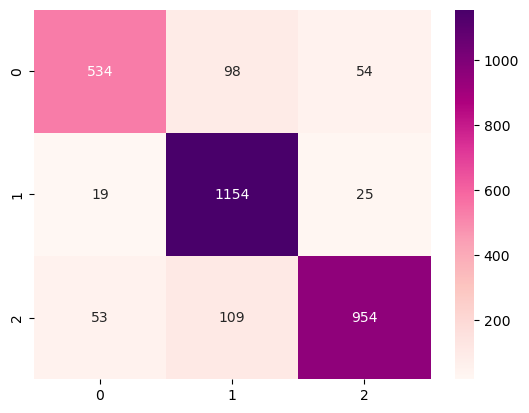

In [13]:
import time
import warnings
from sklearn.ensemble import StackingClassifier

# Suppress FutureWarning for SVM dual parameter
warnings.filterwarnings("ignore", category=FutureWarning)

# Initialize base classifiers with default parameters
base_classifiers = [
    ('linear_svc', LinearSVC()),
    ('kneighbors', KNeighborsClassifier()),
    ('mlp', MLPClassifier(max_iter=100)),
    ('gradient_boosting', GradientBoostingClassifier())
]

# Initialize the stacked classifier
stacked_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=RandomForestClassifier(n_estimators=100),  
    cv=2
)

print("Initializing Stacked Classifier...")
time.sleep(1)  # Simulating initialization time
print("Stacked Classifier Initialized.")

# Train the stacked classifier
print("Training Stacked Classifier...")
stacked_classifier.fit(X_train_tvec, Y_train)
print("Stacked Classifier Training Complete.")

# Predict using testing data
print("Making Predictions...")
stacked_predictions = stacked_classifier.predict(tvec.transform(X_test_cleaned))
print("Prediction Complete.")

# Classification report
report = classification_report(Y_test, stacked_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

# Confusion matrix
ax = plt.subplot()
cm = confusion_matrix(Y_test, stacked_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='RdPu')
ax.set


<ul>
  <li>
    <strong>Initialization of Stacked Classifier:</strong>
    <ul>
      <li>
        <strong>Initialization of Base Classifiers:</strong>
        <ul>
          <li>Import necessary modules for StackingClassifier and weak learners: LinearSVC, KNeighborsClassifier, MLPClassifier, and GradientBoostingClassifier.</li>
          <li>Define a list called <code>base_classifiers</code> containing tuples of the form <code>(name, model)</code>, where <code>name</code> is a string identifier for the base classifier, and <code>model</code> is an instance of the corresponding classifier.</li>
        </ul>
      </li>
      <li>
        <strong>Initialization of Stacked Classifier:</strong>
        <ul>
          <li>Initialize a StackingClassifier object named <code>stacked_classifier</code>.</li>
          <li>Specify parameters such as <code>estimators</code>, <code>final_estimator</code>, and <code>cv</code>.</li>
          <li><code>estimators</code> is set to <code>base_classifiers</code>, which contains the list of base classifiers.</li>
          <li><code>final_estimator=RandomForestClassifier(n_estimators=100)</code> specifies the final estimator, which is a RandomForestClassifier with 100 estimators.</li>
          <li><code>cv=2</code> indicates the number of cross-validation folds to use during training.</li>
        </ul>
      </li>
      <li>
        <strong>Simulated Initialization Time:</strong>
        <ul>
          <li>Use <code>time.sleep(1)</code> to simulate initialization time, delaying the program's execution by 1 second.</li>
        </ul>
      </li>
      <li>
        <strong>Training Stacked Classifier:</strong>
        <ul>
          <li>Print a message indicating the start of training.</li>
          <li>Call the <code>fit()</code> method of <code>stacked_classifier</code> to train the Stacked Classifier using the training data (<code>X_train_tvec</code>, <code>Y_train</code>).</li>
        </ul>
      </li>
      <li>
        <strong>Prediction:</strong>
        <ul>
          <li>Print a message indicating the start of the prediction process.</li>
          <li>Use the trained <code>stacked_classifier</code> to predict the labels for the testing data (<code>X_test_cleaned</code>) by calling the <code>predict()</code> method.</li>
        </ul>
      </li>
      <li>
        <strong>Evaluation - Classification Report:</strong>
        <ul>
          <li>Generate a classification report using the <code>classification_report()</code> function from <code>sklearn.metrics</code>.</li>
          <li>The classification report includes metrics such as precision, recall, F1-score, and support for each class.</li>
          <li>The classification report is printed and displayed as a DataFrame for easy readability.</li>
        </ul>
      </li>
      <li>
        <strong>Evaluation - Confusion Matrix:</strong>
        <ul>
          <li>Create a confusion matrix using the <code>confusion_matrix()</code> function from <code>sklearn.metrics</code>.</li>
          <li>The confusion matrix is displayed as a heatmap using seaborn's <code>heatmap()</code> function to visualize the performance of the Stacked Classifier.</li>
        </ul>
      </li>
    </ul>
  </li>
</ul>


<h2>Boosting</h2>

In [14]:
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

print("Initializing AdaBoost Classifier with Multiple Weak Learners...")
# Initialize multiple weak learners
weak_learners = [
    ('linear_svc', LinearSVC()),
    ('kneighbors', KNeighborsClassifier()),
    ('mlp', MLPClassifier(max_iter=100)),
    ('gradient_boosting', GradientBoostingClassifier())
]

# Initialize AdaBoostClassifier with multiple weak learners
ada_classifier = AdaBoostClassifier(base_estimator=None, n_estimators=100, 
                                    learning_rate=1.0, algorithm='SAMME.R', 
                                    random_state=None)

time.sleep(1)  # Simulating initialization time
print("AdaBoost Classifier Initialized with Multiple Weak Learners.")

# Train the AdaBoost classifier
print("Training AdaBoost Classifier...")
ada_classifier.fit(X_train_tvec, Y_train)
print("AdaBoost Classifier Training Complete.")

# Predict using testing data
print("Making Predictions with AdaBoost Classifier...")
ada_predictions = ada_classifier.predict(tvec.transform(X_test_cleaned))
print("Prediction Complete with AdaBoost Classifier.")

# Classification report
report = classification_report(Y_test, ada_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

Initializing AdaBoost Classifier with Multiple Weak Learners...
AdaBoost Classifier Initialized with Multiple Weak Learners.
Training AdaBoost Classifier...
AdaBoost Classifier Training Complete.
Making Predictions with AdaBoost Classifier...
Prediction Complete with AdaBoost Classifier.
              precision  recall  f1-score  support
negative           0.87    0.70      0.78   686.00
neutral            0.79    0.98      0.88  1198.00
positive           0.94    0.82      0.88  1116.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.87    0.83      0.84  3000.00
weighted avg       0.87    0.86      0.85  3000.00


<ul>
  <li>
    <strong>Initialization of AdaBoost Classifier with Multiple Weak Learners:</strong>
    <ul>
      <li>
        <strong>Initialization of Weak Learners:</strong>
        <ul>
          <li>Import necessary modules for AdaBoostClassifier and weak learners: LinearSVC, KNeighborsClassifier, MLPClassifier, and GradientBoostingClassifier.</li>
          <li>Define a list called <code>weak_learners</code> containing tuples of the form <code>(name, model)</code>, where <code>name</code> is a string identifier for the weak learner, and <code>model</code> is an instance of the corresponding classifier.</li>
        </ul>
      </li>
      <li>
        <strong>Initialization of AdaBoost Classifier:</strong>
        <ul>
          <li>Initialize an AdaBoostClassifier object named <code>ada_classifier</code>.</li>
          <li>Specify parameters such as <code>base_estimator</code>, <code>n_estimators</code>, <code>learning_rate</code>, <code>algorithm</code>, and <code>random_state</code>.</li>
          <li><code>base_estimator=None</code> indicates that AdaBoost will use a decision stump as the default weak learner.</li>
          <li><code>n_estimators=100</code> specifies the number of weak learners (decision stumps) to be used in the ensemble.</li>
          <li><code>learning_rate=1.0</code> controls the contribution of each weak learner to the final prediction.</li>
          <li><code>algorithm='SAMME.R'</code> specifies the algorithm to use for boosting.</li>
          <li><code>random_state=None</code> indicates that the random number generator is initialized based on the system's random number generator.</li>
        </ul>
      </li>
      <li>
        <strong>Simulated Initialization Time:</strong>
        <ul>
          <li>Use <code>time.sleep(1)</code> to simulate initialization time, delaying the program's execution by 1 second.</li>
        </ul>
      </li>
      <li>
        <strong>Training AdaBoost Classifier:</strong>
        <ul>
          <li>Print a message indicating the start of training.</li>
          <li>Call the <code>fit()</code> method of <code>ada_classifier</code> to train the AdaBoostClassifier using the training data (<code>X_train_tvec</code>, <code>Y_train</code>).</li>
        </ul>
      </li>
      <li>
        <strong>Prediction:</strong>
        <ul>
          <li>Print a message indicating the start of the prediction process.</li>
          <li>Use the trained <code>ada_classifier</code> to predict the labels for the testing data (<code>X_test_cleaned</code>) by calling the <code>predict()</code> method.</li>
        </ul>
      </li>
      <li>
        <strong>Evaluation - Classification Report:</strong>
        <ul>
          <li>Generate a classification report using the <code>classification_report()</code> function from <code>sklearn.metrics</code>.</li>
          <li>The classification report includes metrics such as precision, recall, F1-score, and support for each class.</li>
          <li>The classification report is printed and displayed as a DataFrame for easy readability.</li>
        </ul>
      </li>
      <li>
        <strong>Evaluation - Confusion Matrix:</strong>
        <ul>
          <li>Create a confusion matrix using the <code>confusion_matrix()</code> function from <code>sklearn.metrics</code>.</li>
          <li>The confusion matrix is displayed as a heatmap using seaborn's <code>heatmap()</code> function to visualize the performance of the AdaBoost Classifier.</li>
        </ul>
      </li>
    </ul>
  </li>
</ul>


<h1>Bagging</h1>

In [15]:
import time
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize base classifiers with default parameters
base_classifiers = [
    ('linear_svc', LinearSVC()),
    ('kneighbors', KNeighborsClassifier()),
    ('mlp', MLPClassifier(max_iter=100)),
    ('gradient_boosting', GradientBoostingClassifier())
]

# Initialize BaggingClassifier with fewer base estimators
bagging_classifier = BaggingClassifier(estimator=None, n_estimators=5, 
                                       max_samples=1.0, max_features=1.0, 
                                       bootstrap=True, bootstrap_features=False, 
                                       oob_score=False, warm_start=False, 
                                       n_jobs=None, random_state=None, verbose=0)

print("Initializing Bagging Classifier with Fewer Base Estimators...")
time.sleep(1)  # Simulating initialization time
print("Bagging Classifier Initialized with Fewer Base Estimators.")

# Train the Bagging classifier
print("Training Bagging Classifier...")
bagging_classifier.fit(X_train_tvec, Y_train)
print("Bagging Classifier Training Complete.")

# Predict using testing data
print("Making Predictions with Bagging Classifier...")
bagging_predictions = bagging_classifier.predict(tvec.transform(X_test_cleaned))
print("Prediction Complete with Bagging Classifier.")

# Classification report
report = classification_report(Y_test, bagging_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)



Initializing Bagging Classifier with Fewer Base Estimators...
Bagging Classifier Initialized with Fewer Base Estimators.
Training Bagging Classifier...
Bagging Classifier Training Complete.
Making Predictions with Bagging Classifier...
Prediction Complete with Bagging Classifier.
              precision  recall  f1-score  support
negative           0.85    0.71      0.78   686.00
neutral            0.82    0.97      0.89  1198.00
positive           0.91    0.83      0.87  1116.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.86    0.84      0.85  3000.00
weighted avg       0.86    0.86      0.86  3000.00


<ul>
  <li>
    <strong>Bagging (Bootstrap Aggregating)</strong>:
    <ul>
      <li>Bagging is an ensemble learning technique.</li>
      <li>It aims to improve the stability and accuracy of machine learning algorithms.</li>
      <li>Bagging works by training multiple instances of a base learner on different subsets of the training data.</li>
      <li>Each model's prediction is then averaged or combined in some way to make the final prediction.</li>
    </ul>
  </li>
  <li>
    <strong>Weak Learners:</strong>
    <ul>
      <li>In bagging, weak learners refer to the base models trained on subsets of the data.</li>
      <li>These weak learners are typically simple models, such as decision trees.</li>
      <li>Using multiple weak learners helps reduce overfitting and variance in the final prediction.</li>
    </ul>
  </li>
  <li>
    <strong>Initialization:</strong>
    <ul>
      <li>Initialize the Bagging Classifier with the chosen weak learners.</li>
      <li>Each weak learner can be a different machine learning algorithm or a variant with different hyperparameters.</li>
    </ul>
  </li>
  <li>
    <strong>Training:</strong>
    <ul>
      <li>Train the Bagging Classifier on the training data.</li>
      <li>Each weak learner is trained on a subset of the data, with replacement (bootstrap sampling).</li>
    </ul>
  </li>
  <li>
    <strong>Prediction:</strong>
    <ul>
      <li>Make predictions using the trained Bagging Classifier on the testing data.</li>
      <li>Combine the predictions of all weak learners, typically by averaging or voting, to make the final prediction.</li>
    </ul>
  </li>
  <li>
    <strong>Evaluation:</strong>
    <ul>
      <li>Evaluate the performance of the Bagging Classifier using metrics such as accuracy, precision, recall, and F1-score.</li>
      <li>Visualize the results using tools like confusion matrices or classification reports.</li>
    </ul>
  </li>
</ul>

In [16]:
#pickle stack

import pickle

#dump on picle
pickle.dump(lr, open('../Model/stack_election.pkl','wb'))